In [1]:
%matplotlib inline
import numpy as np
np.random.seed(0)
import pandas as pd
import seaborn as sns
import math
half_plot_size = (18, 6)
plot_size = (18, 12)

In [2]:
# Change style according to FH
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.style.use('img/fh_kiel.mplstyle')

from palettable.colorbrewer.qualitative import Paired_8 as q_map

plt.set_cmap(q_map.mpl_colormap)
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

blue = '#00305D'
green = '#006A4D'
orange = '#F49E00'
dark_red = '#B5123E'
alarm_red = '#E20020'
light_green = '#7AB51D'

cmap_kiel = ListedColormap(['#00305D', '#F49E00', '#006A4D'])
cmap_kiel2 = ListedColormap(['#00305D', '#F49E00'])


<Figure size 640x480 with 0 Axes>

# Grundlagen Maschinelles Lernen

## Fundamentals of Machine Learning


Prof. Dr.-Ing. Daniel Böhnke

# Vorhersage Triebwerkszustand

* Basierend auf der Drehzahl und der Vibration bestimmen Sie den Zustand des Triebwerks (ok, oder nicht ok)? Wie lauten $X$ und $Y$ für Ihre Fragestellung?

<center><img src="img/skizze_defekt.png" width=40% class="stretch"></center>

# Vorhersage Origin

Basierend auf Leistung und Verbrauch bestimmen Sie den Ursprungskontinent (Origin im Auto Datensatz)? Wie lauten $X$ und $Y$ für Ihre Fragestellung?

<center><img src="img/skizze_origin.png" width=40% class="stretch"></center>

# Zusammenfassung Bewertung Klassifikation 

<center><img src="img/tafel_bewertung.png" width=60% class="stretch"></center>

# Steckbrief Logistische Regression
<center><img src="img/steckbrief_logreg.png" width=80% class="stretch"></center>

# Steckbrief kNN
<center><img src="img/steckbrief_knn.png" width=80% class="stretch"></center>

# Heute 

* In der vergangenen Woche wurden die Grundlagen der Klassifikation eingeführt.
* Sie haben bereits einige Modelle kennen gelernt und auf den Auto Datensatz angewandt. 
* Die Bewertung der Modelle ist noch nicht schlüssig. Zunächst müssen der Test-Aufbau und die **Validierung** besprochen werden. 
* Insbesondere bei schlechten Klassenverhältnissen waren die Ergebnisse aber unter-durchschnittlich. 
* Daher werden heute Verfahren des **Feature Engineerings** eingeführt, die es ermöglichen die Daten so aufzubereiten, dass die bekannten Modelle bessere Ergebnisse liefern.

# Lernlandkarte 
<center><img src="img/lernlandkarte.png" width=80% class="stretch"></center>

# Negativ-Beispiel: k-NN mit $k=1$

In [3]:
# Lade Auto-Datensatz 
df = pd.read_csv('Auto.csv')
df['horsepower'] = np.where(df['horsepower']=='?', None, df['horsepower'])
df = df.dropna()
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['fuel_saver'] = np.where(df['mpg']>30, 1, 0)

In [4]:
# Trainiere einen k-NN mit einem Nachbarn
from sklearn.neighbors import KNeighborsClassifier
model_knn_1 = KNeighborsClassifier(n_neighbors=1).fit(df[['mpg', 'horsepower']], df['fuel_saver'])
df['prediction(fuel_saver)'] = model_knn_1.predict(df[['mpg', 'horsepower']])

In [5]:
# Bewertung
df['korrekt'] = np.where(df['prediction(fuel_saver)']==df['fuel_saver'], 1, 0)
df['korrekt'].sum()/len(df)

1.0

#### Was ist hier schief gegangen?

# Validierung 




*when you have two competing theories that make exactly the same predictions, the simpler one is the better.*

<div style="text-align: right"> Eine der vielen Interpretationen von Occams Rasiermesser </div>


$$Y = f(X) + \epsilon$$

* $X$ entspricht den Prediktoren (Unabhängigen Variablen, Features, Input).
* $Y$ entspricht der Antwort (Abhängige Variable, Output).
* $\epsilon$ entspricht dem zufälligen Fehlerterm mit $\mu \approx 0$
* $f(X)$ ist die "unbekannte" Funktion zwischen Prediktor und Antwort.
* $f(X)$ stellt somit den systematischen Zusammenhang zwischen $Y$ und $X$ dar.

# Grundformel des Maschinellen Lernens

* Wir versuchen ein Modell zu bauen, welches $Y$ so gut wie möglich vorhersagt:
$$Y = f(X) + \epsilon$$
    
$$\hat{Y} = \hat{f}(X) $$

* Da $Y$ aber nicht nur einem systematischen Zusammenhang $f(X)$ unterliegt, sondern den Zufallsterm $\epsilon$ beinhaltet, kann die Vorhersage niemals exakt werden. 

* D.h. unsere Vorhersage beinhaltet einen *reduzierbaren* und einen *nicht-reduzierbaren* Fehler. 

* Dann ist es unsere nächste Aufgabe den Fehler an dieser Stelle weitestgehend zu reduzieren. 
* Den Fehler wird als Erwartungswert der Residuuen notiert:

$$\begin{align}
E(Y-\hat{Y})^2 &= E(f(X) + \epsilon-\hat{f}(X))^2\\
               &= [f(X)-\hat{f}(X)]^2+\mathrm{Var}(\epsilon)
\end{align}$$

* $\mathrm{Var}(\epsilon)$ können wir nicht reduzieren, es ist von Anfang an Bestandteil der Daten.



# Die drei Bestandteile des Fehlers

<center><img src="img/tafel_validierung.png" width=60% class="stretch"></center>

$$E\left(Y-\hat{f}(X)\right)^2 = \mathrm{Var}(\hat{f}(X))+ \left[\mathrm{Bias}(\hat{f}(X))\right]^2+ \mathrm{Var}(\epsilon)$$

* Wir sparen uns hier die Herleitung! (Lesehinweis: ISL Kapitel 2.2.2)
* $\mathrm{Var}(\hat{f}(x))$ ist die Varianz unseres Modells: Unser Modell variiert/schwankt stark mit den Trainingsdaten.
* $\left[\mathrm{Bias}(\hat{f}(x))\right]^2$ ist der Bias bzw. die Verzerrung des Modells: Die Annahmen des Modells stimmen nicht.
* $\mathrm{Var}(\epsilon)$ Ursache ist der zufallsbedingte Anteil unserer Daten, diesen Fehler ist nicht reduzierbar. 


# Test-Trainingsdaten

<center><img style="float: right;" src="img/tafel_test.png" width=20% class="stretch"></center>

* Den **Underfit** merken wir schnell, der Score ist schlecht....
* Einen **Overfit** festzustellen, ist schwieriger. Auf den Trainingsdaten funktioniert das Modell schließlich gut.
* Um diesem Effekt vorzubeugen, werden die Daten in einen Test und einen Trainingsdatensatz geteilt.
* Das Modell trainiert auf den Trainings-Daten und wird auf den Testdaten evaluiert.
* Das Modell mit der besten Performance auf den Test-Daten wird ausgewählt.
* Wichtig ist es hierbei eine "Ähnlichkeit" der Datensätze zu erhalten.

# Test-Trainingsdaten II

<center><img style="float: right;" src="img/tafel_test.png" width=20% class="stretch"></center>

* Die Daten sollten so aufgeteilt werden, dass die jeweiligen Datensätze *repräsentativ* sind. 
* Es sollte ein sinniges Aufteilungsverhältnis gewählt werden. Als Daumenregel *80/20* bei kleinen Datensätzen *70/30*, um eine ausreichende Testmenge zu behalten. 
* Es ist darauf zu achten, dass keine *Lücke* in den Daten besteht. Es gilt zu vermeiden, dass aus den Trainingsdaten direkt auf die Testdaten geschlossen werden kann. 
* Bei Zeitreihen sollte darauf geachtet werden, dass die zeitliche Reihenfolge erhalten bleibt. In der Regel liegen die Testdaten in der *Zukunft*. 



# Randomisiertes Sampling

```python
numpy.random.seed(42)
```

* Wie werden die Daten in Test- und Trainingsdaten aufgeteilt?
* Es sollten möglichst keine systematischen Fehler durch den Test-Aufbau entstehen.
* Daher werden die Daten zufallsbasiert aufgeteilt. 
* Um dennoch eine Wiederholbarkeit des Experiments zu gewährleisten, sollte der Seed des Samplings beibehalten werden. 

# Stratified Sampling

<center><img style="float: right;" src="img/tafel_stratified.png" width=30% class="stretch"></center>

* Ein entscheidendes Kriterium für eine gute Modellbildung ist die Klassenverteilung.
* Damit der Test- und Trainingsdatensatz für die Validierung wertig ist, muss diese Klassenverteilung erhalten bleiben.
* Genau das macht **Stratified Sampling**, indem es versucht die ursprüngliche Klassenverteilung beizubehalten.
* Für größere Datensätze ist hier ein kleinerer Fehler zu erwarten.


# Experiment Train/Test K-Nearest-Neighbour

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# feature matrix
X = df[['horsepower', 'weight']]

# target vector
y = df['fuel_saver']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [7]:
test_f1 = []
train_f1 = []
depth = range(1,11)
for d in depth:
    estimator = KNeighborsClassifier(n_neighbors=d)
    estimator.fit(X_train, y_train)
    test_f1.append(f1_score(y_test, estimator.predict(X_test)))
    train_f1.append(f1_score(y_train, estimator.predict(X_train)))

# Ergebnisse k-NN

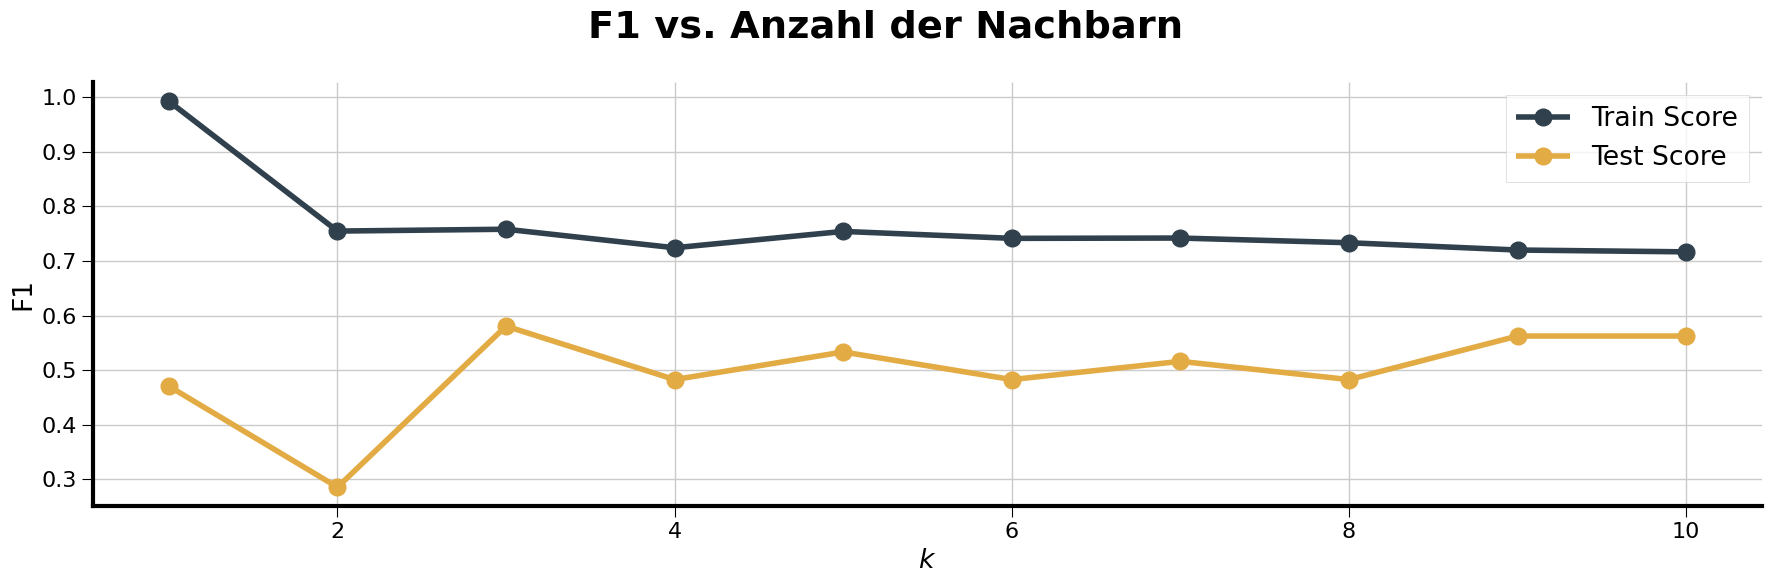

In [8]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

ax.plot(range(1, 11), train_f1, 'o-', label='Train Score')
ax.plot(range(1, 11), test_f1, 'o-', label='Test Score')


plt.xlabel('$k$')
plt.ylabel('F1')
plt.legend()
plt.suptitle('F1 vs. Anzahl der Nachbarn')
plt.tight_layout();

* Welches Modell ist das "Beste" und warum?

# Kreuzvalidierung / Cross-Validation

<center><img src="img/tafel_cross.png" width=60% class="stretch"></center>

* Um zu vermeiden, dass unser Score durch ein unglückliches Sampling manipuliert wird, versuchen wir alle Daten zu verwenden.
* Bei der Cross-Validation wird der Datensatz in $n$ Stücke zerlegt.
* In jeder von $n$ Iterationen wird das Modell dann mit $n-1$ Datensätzen trainiert und der verbleibende Teil zur Validierung genutzt.
* Somit sind werden alle Daten verwendet und der Score ist repräsentativ.
* Wir werden Cross-Validation noch zu einem späteren Zeitpunkt in KNIME einsetzen.

# Feature Engineering

<center><img style="float: right;" src="img/tafel_fe.png" width=30% class="stretch"></center>

* Zwei Wege stehen zur Verfügung, um ML-Algorithmen zu unterstützen:
    * Hyperparameter Tuning
    * Feature Engineering
* Wir setzen Wissen über die Daten und Modelle ein, um neue / bessere Feature ($X$) zu bauen.
* Kombination aus statistischen und fachlichen Methoden
* Die verschiedenen Methoden des Feature Engineering sind abhängig von den vorhandenen Daten anzuwenden. z.B. werden Sie sehen, dass ein Dummy Encoding nur für qualitative Variablen sinnig ist.
* Je nachdem welche Modelle Sie verwenden, haben bestimmte Methoden des Feature Engineering einen Effekt oder nicht. z.B. profitiert k-NN stark von der Skalierung der Daten. Für den Entscheidungsbaum bringt die Skalierung keinen Unterschied. 
* Es ist daher schwer, ein allgemeingültiges Beispiel für alle Fälle zu finden,

# (Einige) Methoden des Feature Engineering

* Missing Values
* Transformation ( haben wir bereits kennengelernt)
* Dummy Encoding
* Aggregation
* Skalierung
* Over / Under-Sampling
* (Rotation)
* (Domänen Wissen)

# Missing Values

<center><img style="float: right;" src="img/skizze_missing.png" width=30% class="stretch"></center>


* Strenggenommen nicht Teil des Feature Engineerings (Data Cleaning).
* (Nicht-)Information sind für Algorithmen nicht zu verarbeiten.
* Missing Values müssen daher in der ein oder anderen Form verarbeitet werden. 

1. Bestimmen Sie den Umfang der fehlenden Daten?
2. Gibt es ggfs. systematische Effekte oder scheint das Fehlen der Daten zufällig?

### Filtern der Zeile

* Wie hoch ist der Anteil an Missing Values?
* Anzahl der Samples ($n$) wird reduziert.
* Einfach umzusetzende Lösung.

### Filtern der Spalte

* Einige wenige Spalten haben viele MV.
    * Filtern der Zeilen würde $n$ stark reduzieren
    * Besser Filtern der Spalte und Reduktion von $p$ akzeptieren.
* Missing Values in vielen Zeilen und Spalten
    * Auffüllen ist notwendig. (z.B. Mittelwert oder Median)
    * Korrekte Methode ist domänen-abhängig.

# Missing Values auffüllen

- **Numerische Daten**: Methoden wie Mittelwert- oder Median-Imputation sind gebräuchlich.
- **Kategoriale Daten**: Häufig wird der Modus verwendet oder es wird eine separate Kategorie für fehlende Daten erstellt.






- **Imputation**: Ersetzen der fehlenden Werte durch Schätzungen. Verschiedene Imputationstechniken können angewendet werden:
     - **Einfache Imputation**: Ersetzen durch Mittelwert, Median, Modus oder einen konstanten Wert. Einfach, aber kann zu einer Unterschätzung der Varianz führen.
     - **Multivariate Imputation**: Verwendet andere Informationen im Datensatz, um fehlende Werte zu schätzen, z.B. durch regressionsbasierte Techniken oder k-nearest neighbors.
     - **Imputation unter Verwendung von Modellen**: Einsatz von fortgeschrittenen Modellen wie Random Forest oder neuronalen Netzen, um fehlende Daten zu schätzen.


# Dummy Encoding / One Hot Encoding

* Kardinale Merkmale, z.B. Horsepower, können wir einfach für unsere Modelle nutzen
* Wie gehen wir mit nominalen/ordinalen Merkmalen um?



* Problemstellung: Hinter der Gruppenzugehörigkeit gibt es keine Rangfolge!
* Der Algorithmus kann die Informationen nicht als Zahlenwerte erhalten, andernfalls interpretiert er eine Reihenfolge.
* Wir erstellen eine Dummy Encoding, das für jede Zugehörigkeit eine neue **boolsche Spalte** erstellt.

# Beispiel Dummy Encoding Fuel Saver

* Sie wollen Fuel Saver klassifizieren!
* Das Feature Origin soll mit verwendet werden! Wie bringen Sie die neue Spalte ein?

In [9]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,fuel_saver,prediction(fuel_saver),korrekt
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,0,0,1
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1,1,1
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1,1,1
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,0,0,1
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10,1,1,1


In [10]:
df = pd.get_dummies(df, columns=['origin'])
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,fuel_saver,prediction(fuel_saver),korrekt,origin_1,origin_2,origin_3
392,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,0,0,1,True,False,False
393,44.0,4,97.0,52,2130,24.6,82,vw pickup,1,1,1,False,True,False
394,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,1,1,True,False,False
395,28.0,4,120.0,79,2625,18.6,82,ford ranger,0,0,1,True,False,False
396,31.0,4,119.0,82,2720,19.4,82,chevy s-10,1,1,1,True,False,False


# Aggregation

* In der Aggregation fassen wir mehrere Elemente einer Menge zu einem Wert zusammen z.B.: 
    * Mittelwert
    * Min / Max
    * Summe
    * Größte Abweichung etc.
* In welche Richtung unseres Datensatzes sollen Aggregate vorgenommen werden?
    * Über Zeilen, d.h. innerhalb einer Variable
    * Über Spalten, d.h. über verschiedene Variablen hinweg

### Aggregate (über Spalten / Attribute)

* Vergleich Symmetrischer Merkmale
* z.B.: 4 Elektromotoren in einem Fahrzeug
    * Welche Leistung wird bezogen?
    * In welchem Verhältnis steht dies zu den anderen Motoren und dem Fahrzustand

### Aggregate (über Zeilen / Zeit / Fortschritt)

* Bei der Zusammenfassung von z.B. Zeitreihen oder Zuständen
* Während eines bestimmten Intervalls: Was war der größte, kleinste, mittlere Wert?
* Wird häufig verwendet, wenn gröbere Intervalle bewertet werden sollen, als in den Daten verfügbar sind (Histogramme).
* Wir benötigen einen neuen Datensatz, um dies zu verdeutlichen!

# Beispiel Aggregation: Turbofan Engine Degradation Simulation Data Set

<center><img style="float: right;" src="img/NASA.png" width=30% class="stretch"></center>

* Data Science Challenge der NASA
* Zeitreihen über verschiedene Sensoren 
* Von Zeitpunkt X bis Triebwerksausfall
* Daten anonymisiert



In [11]:
# Laden des Triebwerkdatensatzes
sensors = ['sensor_'+str(i) for i in range(23)]
names = ['unit', 'cycle', 'ops1', 'ops2', 'ops3']+sensors
df = pd.read_csv('train_FD003.txt', sep=' ', header=None, names=names)
df = df.drop(columns=['sensor_21', 'sensor_22'])
df.head()

,unit,cycle,ops1,ops2,ops3,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,...,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583


# Sensor 1 über Zeit als Rohdaten



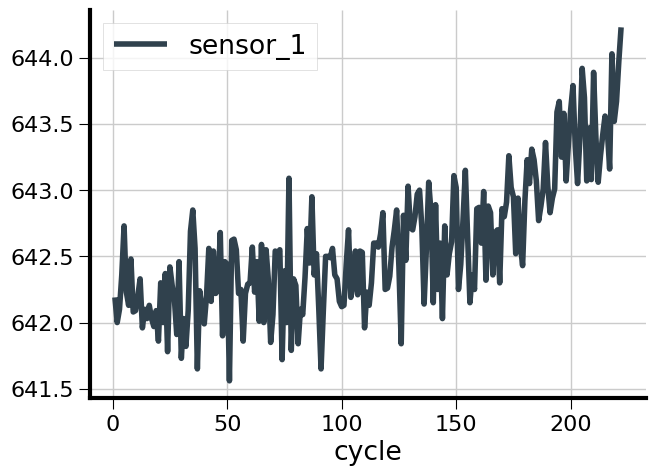

In [12]:
df[df.unit==3].plot(x='cycle', y=['sensor_1']);

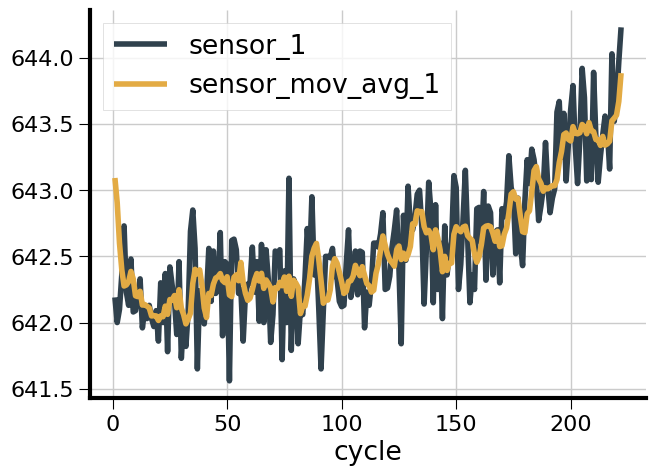

In [13]:
df['sensor_mov_avg_1'] = df['sensor_1'].rolling(5).mean()
df[df.unit==3].plot(x='cycle', y=['sensor_1', 'sensor_mov_avg_1']);

# Histogramm



<center><img style="float: right;" src="img/histogram_2019.png" width=30% class="stretch"></center>

* Problemstellung: Manche Sensordaten sind zeitlich höher aufgelöst als andere.
* Eine Aggregation über den Mittelwert ist nicht genau genug. 
* Wenn die Verteilung der Daten nicht bekannt ist / geschätzt werden kann, bietet sich ein Histogramm an. 
* Ein Histogramm beschreibt die Anzahl von Messwerten in einem bestimmten Bereich > *Bin*
* Jede *Bin* kann zu einer Spalte eines Datensatzes werden
* Insbesondere bei Zeitreihen sehr hilfreich!

# Skalierung

* Daten sind in irgendeiner Größenordnung definiert (z.B. kilo, mega, giga etc).
* Daten sind in irgendeiner Einheit definiert (z.B. Zeit in Jahren, Leistung in PS).
* Für die statistische Betrachtung ist dies nicht immer hilfreich.
* Beispiel: Der k-NN berechnet die Distanz zwischen mehreren Attributen ohne eine Kenntnis darüber zu haben, wie die Achsen zueinander skalieren.
* Eine Skalierung aller Attribute ist daher hilfreich.
* Oft verwendete Ansätze:
    * Min/Max 
    * Z-Normalisierung
    * Robustes Skalieren

# Z-Normalisierung

* Bezogen auf den Mittelwert
* Auslenkung relativ zur Standardabweichung
* Wertebereich +/- $\infty$    

$$x_{norm} = \frac{x-\mu}{\sigma}$$



In [14]:
# Laden des Triebwerkdatensatzes
sensors = ['sensor_'+str(i) for i in range(23)]
names = ['unit', 'cycle', 'ops1', 'ops2', 'ops3']+sensors
df = pd.read_csv('train_FD003.txt', sep=' ', header=None, names=names)
df = df.drop(columns=['sensor_21', 'sensor_22'])
df.head() # Daten in ihren natürlichen Einheiten (, die wir noch nichtmal kennen)

,unit,cycle,ops1,ops2,ops3,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,...,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583


# Beispiel Skalierung: Triebwerksdaten

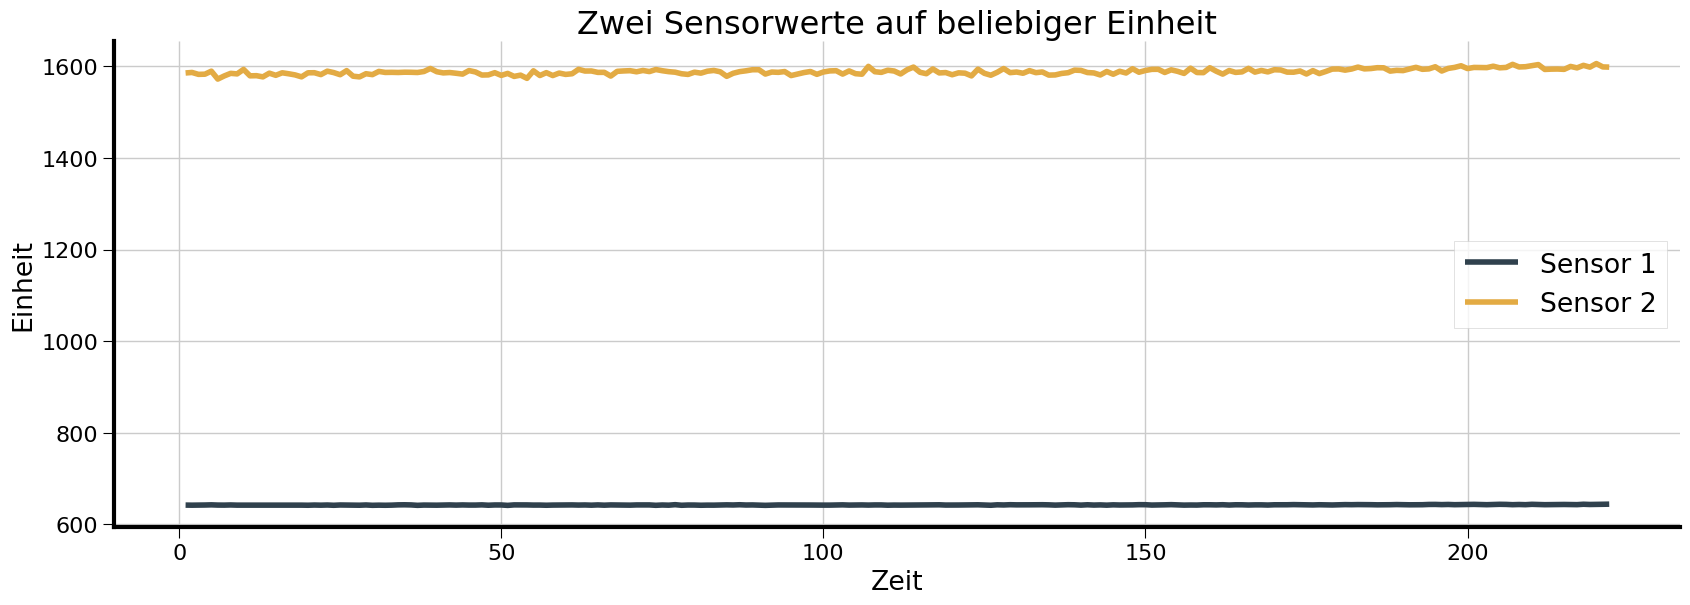

In [15]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

ax.plot(df[df.unit==3].cycle, df[df.unit==3].sensor_1, label='Sensor 1')
ax.plot(df[df.unit==3].cycle, df[df.unit==3].sensor_2, label='Sensor 2')

plt.title('Zwei Sensorwerte auf beliebiger Einheit')
ax.legend()
plt.xlabel('Zeit')
plt.ylabel('Einheit')
plt.show()

In [16]:
# Z-Skalierung für alle Parameter
sensors = ['sensor_'+str(i) for i in range(21)]
df[sensors] = df[sensors].apply(lambda x: (x - x.mean()) / x.std())

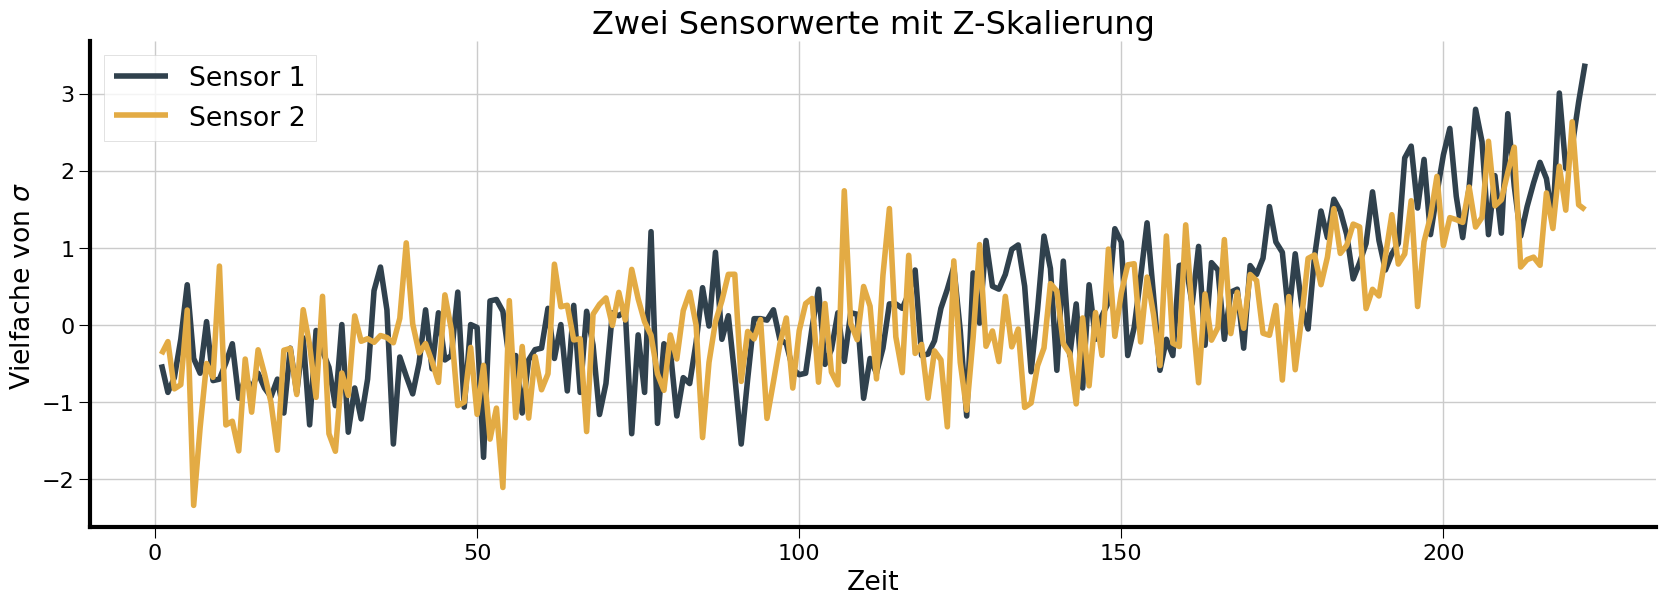

In [17]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

ax.plot(df[df.unit==3].cycle, df[df.unit==3].sensor_1, label='Sensor 1')
ax.plot(df[df.unit==3].cycle, df[df.unit==3].sensor_2, label='Sensor 2')

plt.title('Zwei Sensorwerte mit Z-Skalierung')
ax.legend()
plt.xlabel('Zeit')
plt.ylabel('Vielfache von $σ$')
plt.show()

# Min-Max Skalierung

* Relativ zu Extremwerten
* Anfällig für Ausreißer
* Wertebereich $0 - 1$

$$x_{norm} = \frac{x-min(x)}{max(x)-min(x)}$$


# Robust Scaler

* Viele Skalierungsmethoden sind anfällig für Ausreißer etc. 
* Der Robuste Skalierer basiert auf Median und Quantilsabständen
* Wertebereich $\pm \infty$

$$x_{norm} = \frac{x-\tilde{x}}{Q_{75}(x)-Q_{25}(x)}$$

# Beispiel Skalierer

* Hier werden die Daten eines Maschinetype gezeigt. Betriebsstunden über Energieverbräuche. 
* Was fällt Ihnen auf? Welche Skalierer bieten sich hier an?

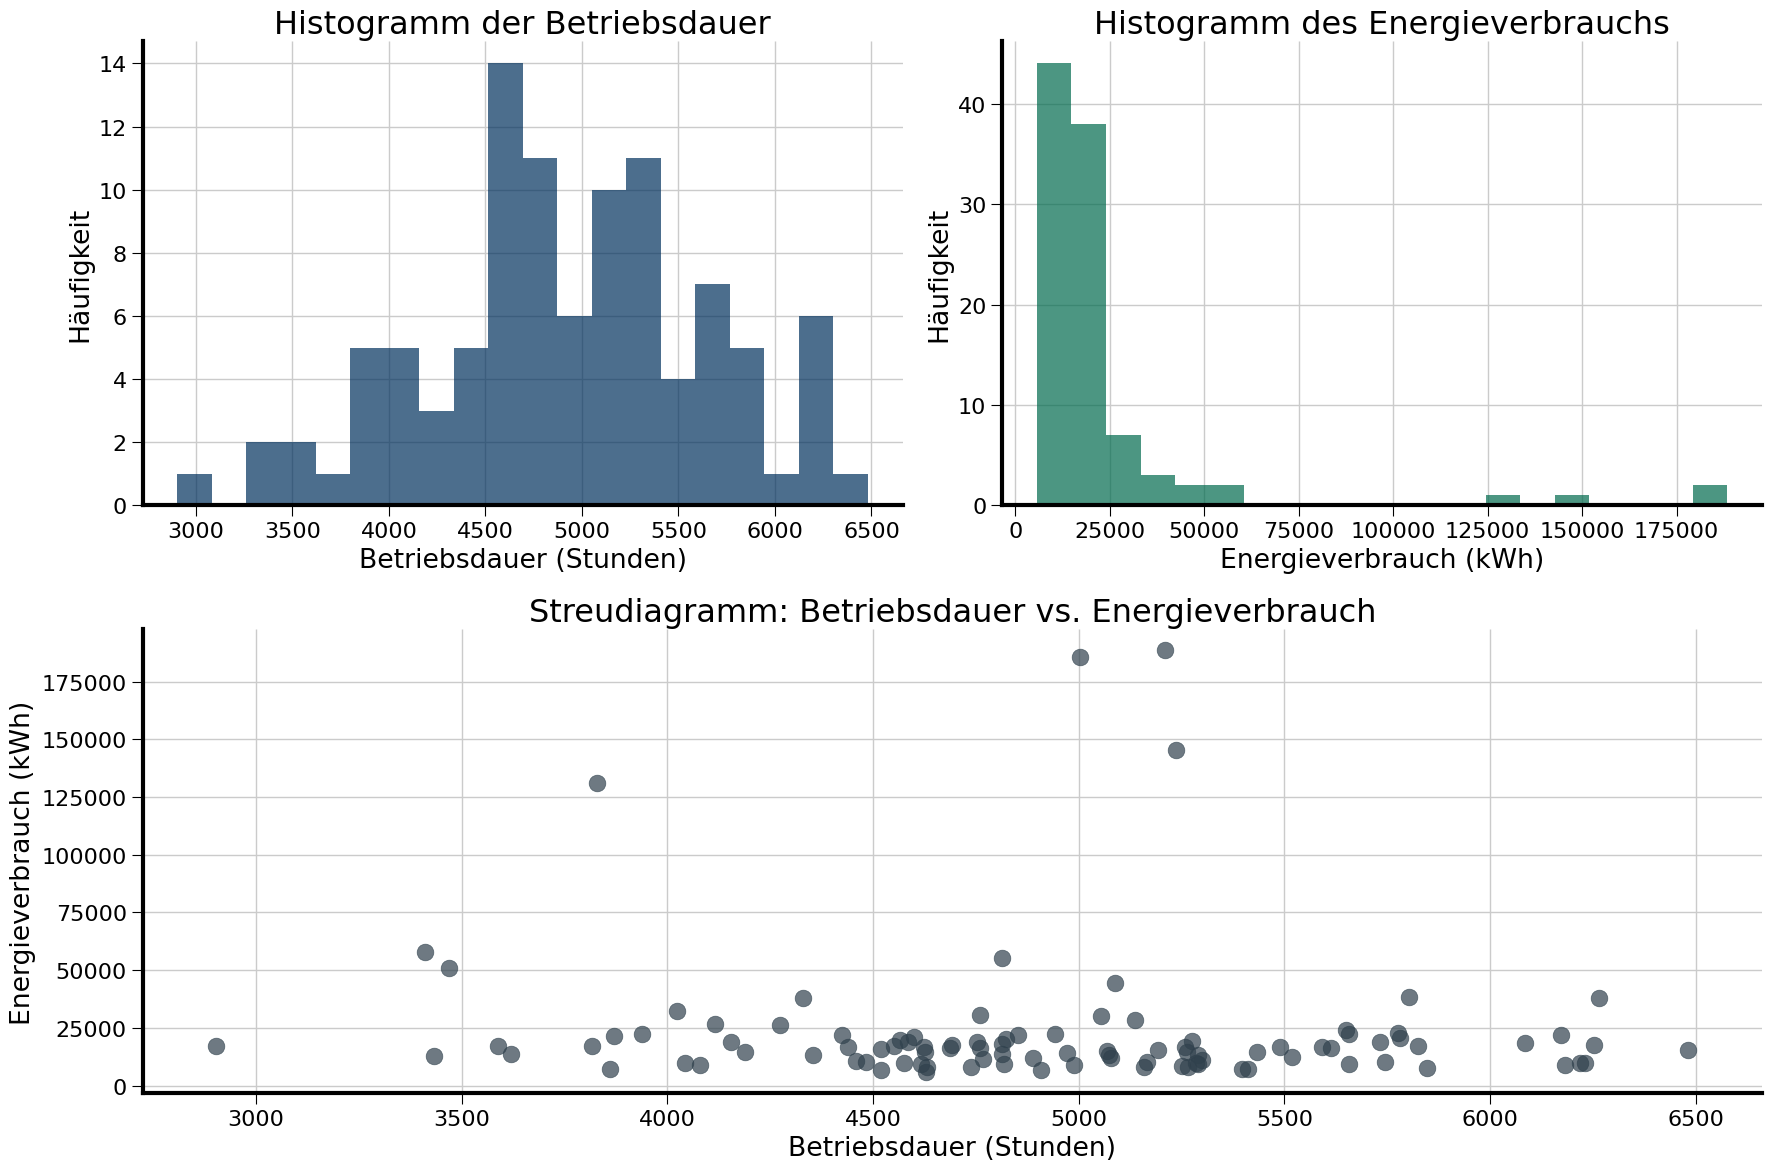

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setzen eines Seeds für Reproduzierbarkeit
np.random.seed(42)

# Anzahl der Datenpunkte
n_samples = 100

# Generieren der Daten
# Betriebsdauer: Normalverteilte Daten um 5000 Stunden mit einer Standardabweichung von 800 Stunden
operation_hours = np.random.normal(loc=5000, scale=800, size=n_samples)

# Energieverbrauch: Log-normalverteilte Daten, um größere Unterschiede in den Skalen zu erzeugen
energy_consumption = np.random.lognormal(mean=5, sigma=0.5, size=n_samples) * 100

# Hinzufügen von Ausreißern im Energieverbrauch
n_outliers = 5
outliers = np.random.lognormal(mean=7, sigma=0.5, size=n_outliers) * 100
energy_consumption[-n_outliers:] = outliers  # Ersetzen der letzten n_outliers Werte

# Erstellen eines DataFrame
data = pd.DataFrame({
    'Betriebsdauer (Stunden)': operation_hours,
    'Energieverbrauch (kWh)': energy_consumption
})

# Erstellen der Plots
#fig, ax = plt.subplots(3, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1, 1]})
plt.figure(figsize=plot_size)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3]


# Scatterplot der beiden Dimensionen über die ganze Breite
ax3.scatter(data['Betriebsdauer (Stunden)'], data['Energieverbrauch (kWh)'], alpha=0.7)
ax3.set_title('Streudiagramm: Betriebsdauer vs. Energieverbrauch')
ax3.set_xlabel('Betriebsdauer (Stunden)')
ax3.set_ylabel('Energieverbrauch (kWh)')

# Histogramm der Betriebsdauer
ax1.hist(data['Betriebsdauer (Stunden)'], bins=20, color=blue, alpha=0.7)
ax1.set_title('Histogramm der Betriebsdauer')
ax1.set_xlabel('Betriebsdauer (Stunden)')
ax1.set_ylabel('Häufigkeit')

# Histogramm des Energieverbrauchs
ax2.hist(data['Energieverbrauch (kWh)'], bins=20, color=green, alpha=0.7)
ax2.set_title('Histogramm des Energieverbrauchs')
ax2.set_xlabel('Energieverbrauch (kWh)')
ax2.set_ylabel('Häufigkeit')

# Verbesserung der Layouts
plt.tight_layout()
plt.show()


# Z Skalierung

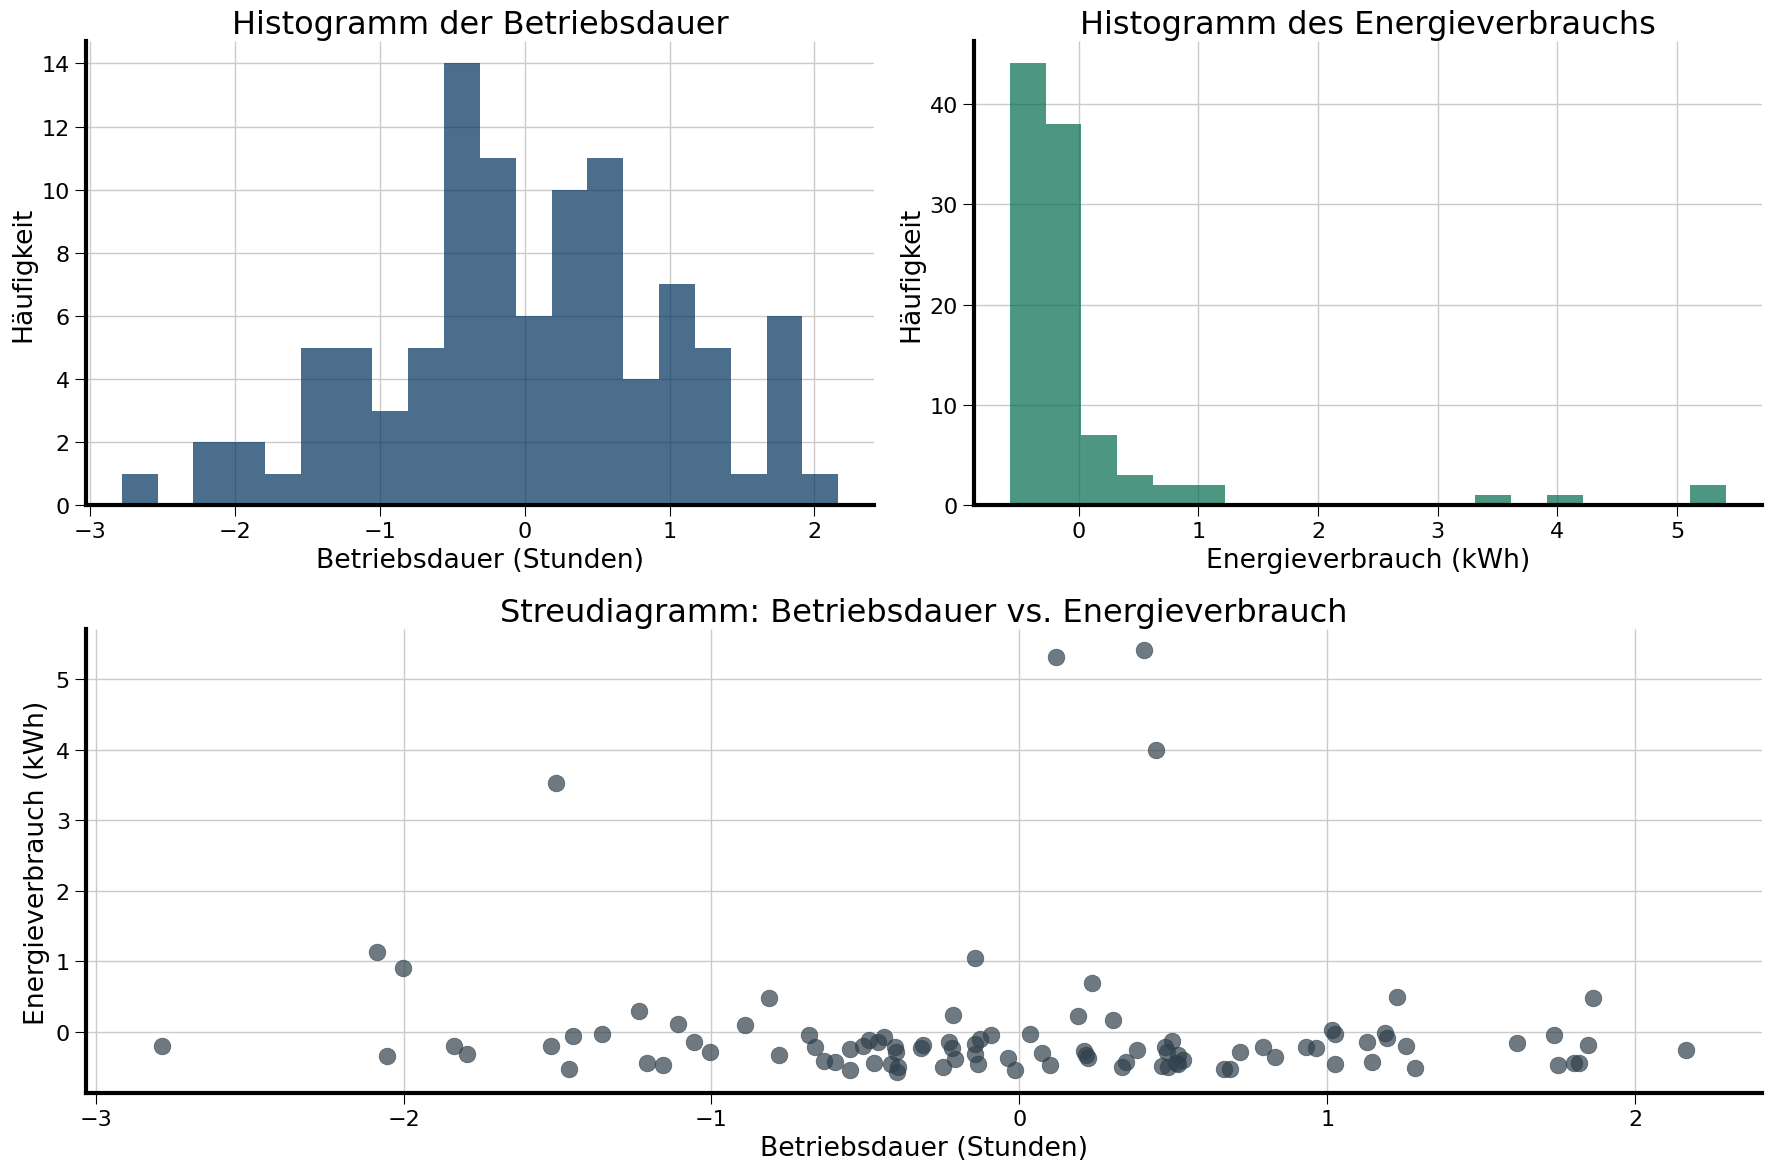

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Setzen eines Seeds für Reproduzierbarkeit
np.random.seed(42)

# Anzahl der Datenpunkte
n_samples = 100

# Generieren der Daten
# Betriebsdauer: Normalverteilte Daten um 5000 Stunden mit einer Standardabweichung von 800 Stunden
operation_hours = np.random.normal(loc=5000, scale=800, size=n_samples)

# Energieverbrauch: Log-normalverteilte Daten, um größere Unterschiede in den Skalen zu erzeugen
energy_consumption = np.random.lognormal(mean=5, sigma=0.5, size=n_samples) * 100

# Hinzufügen von Ausreißern im Energieverbrauch
n_outliers = 5
outliers = np.random.lognormal(mean=7, sigma=0.5, size=n_outliers) * 100
energy_consumption[-n_outliers:] = outliers  # Ersetzen der letzten n_outliers Werte

# Erstellen eines DataFrame
data = pd.DataFrame({
    'Betriebsdauer (Stunden)': operation_hours,
    'Energieverbrauch (kWh)': energy_consumption
})

# Initialisieren des StandardScalers
scaler = StandardScaler()

# Anwenden des StandardScalers auf die Daten
scaled_data = scaler.fit_transform(data)

# Konvertieren der skalierten Daten zurück in ein DataFrame
data = pd.DataFrame(scaled_data, columns=data.columns)


# Erstellen der Plots
#fig, ax = plt.subplots(3, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1, 1]})
plt.figure(figsize=plot_size)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3]


# Scatterplot der beiden Dimensionen über die ganze Breite
ax3.scatter(data['Betriebsdauer (Stunden)'], data['Energieverbrauch (kWh)'], alpha=0.7)
ax3.set_title('Streudiagramm: Betriebsdauer vs. Energieverbrauch')
ax3.set_xlabel('Betriebsdauer (Stunden)')
ax3.set_ylabel('Energieverbrauch (kWh)')

# Histogramm der Betriebsdauer
ax1.hist(data['Betriebsdauer (Stunden)'], bins=20, color=blue, alpha=0.7)
ax1.set_title('Histogramm der Betriebsdauer')
ax1.set_xlabel('Betriebsdauer (Stunden)')
ax1.set_ylabel('Häufigkeit')

# Histogramm des Energieverbrauchs
ax2.hist(data['Energieverbrauch (kWh)'], bins=20, color=green, alpha=0.7)
ax2.set_title('Histogramm des Energieverbrauchs')
ax2.set_xlabel('Energieverbrauch (kWh)')
ax2.set_ylabel('Häufigkeit')

# Verbesserung der Layouts
plt.tight_layout()
plt.show()


# Min Max Skalierung

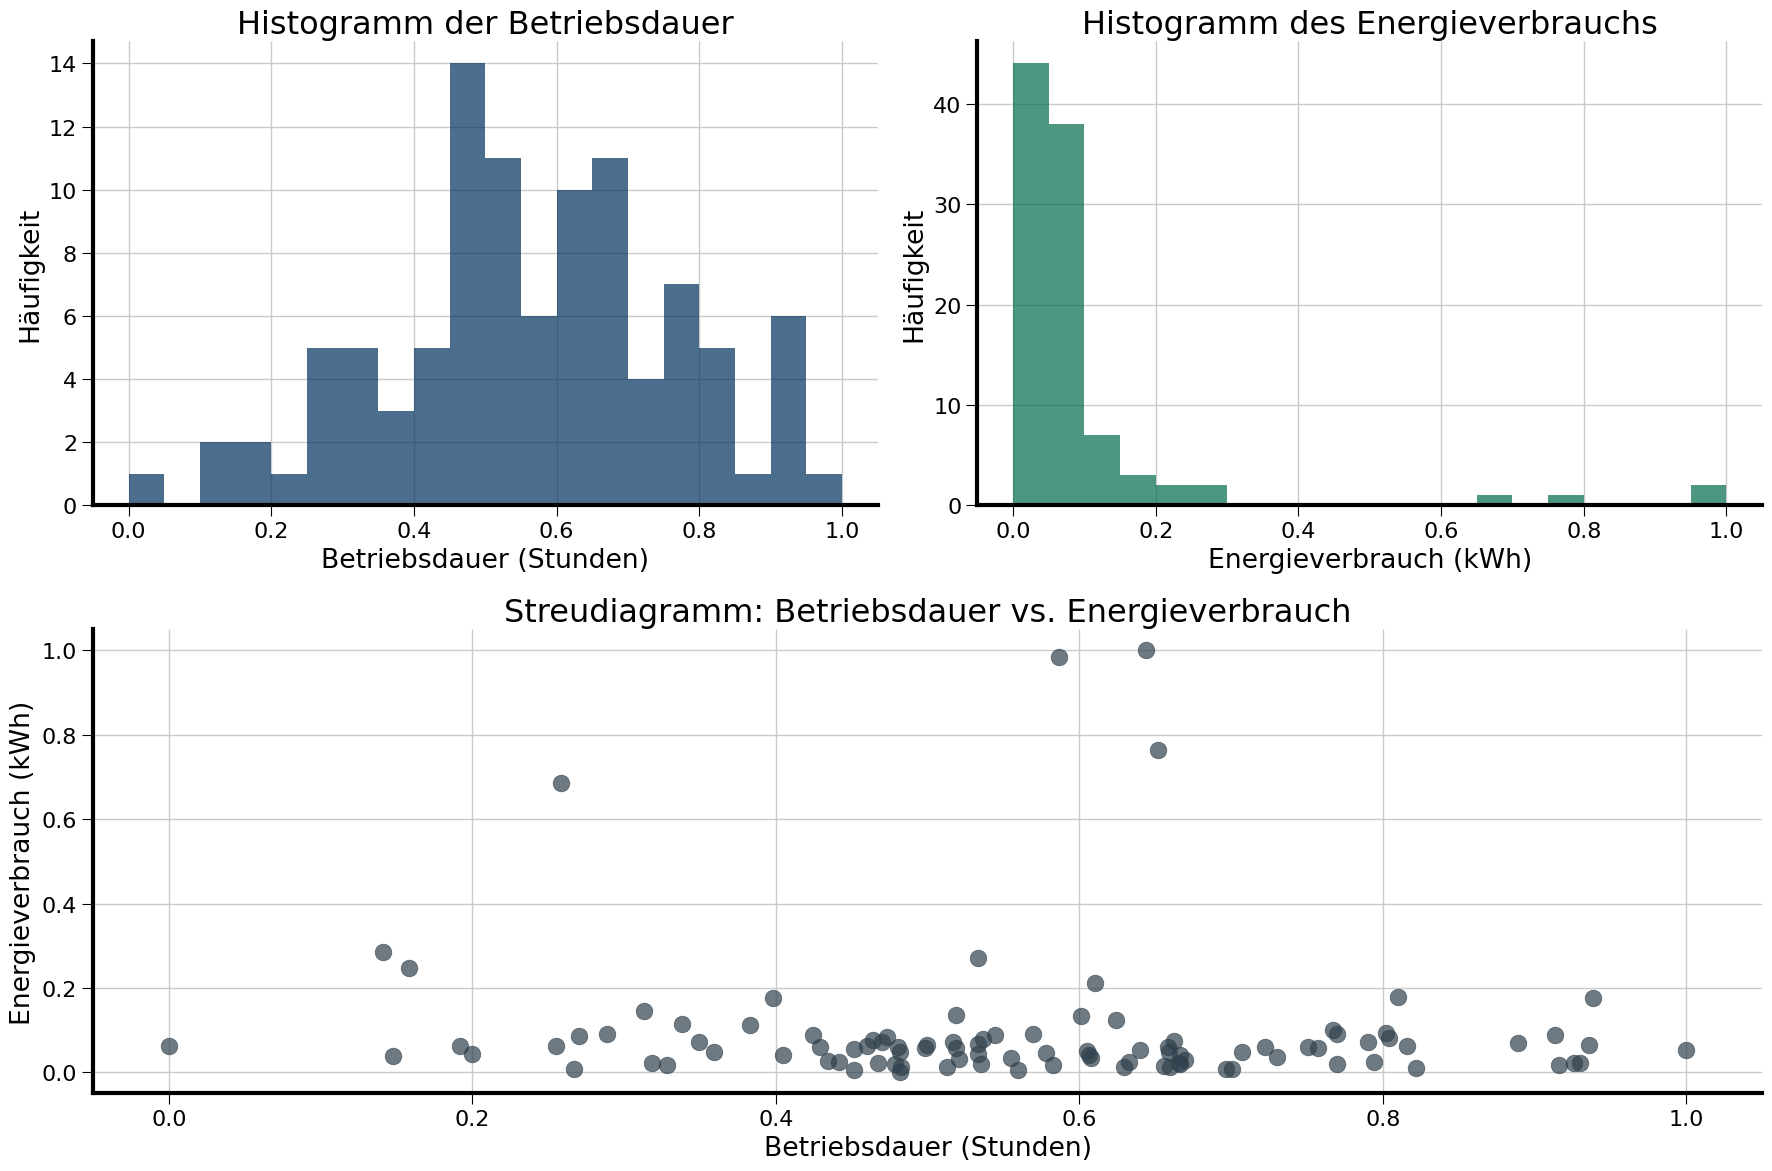

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Setzen eines Seeds für Reproduzierbarkeit
np.random.seed(42)

# Anzahl der Datenpunkte
n_samples = 100

# Generieren der Daten
# Betriebsdauer: Normalverteilte Daten um 5000 Stunden mit einer Standardabweichung von 800 Stunden
operation_hours = np.random.normal(loc=5000, scale=800, size=n_samples)

# Energieverbrauch: Log-normalverteilte Daten, um größere Unterschiede in den Skalen zu erzeugen
energy_consumption = np.random.lognormal(mean=5, sigma=0.5, size=n_samples) * 100

# Hinzufügen von Ausreißern im Energieverbrauch
n_outliers = 5
outliers = np.random.lognormal(mean=7, sigma=0.5, size=n_outliers) * 100
energy_consumption[-n_outliers:] = outliers  # Ersetzen der letzten n_outliers Werte

# Erstellen eines DataFrame
data = pd.DataFrame({
    'Betriebsdauer (Stunden)': operation_hours,
    'Energieverbrauch (kWh)': energy_consumption
})

# Initialisieren des StandardScalers
scaler = MinMaxScaler()

# Anwenden des StandardScalers auf die Daten
scaled_data = scaler.fit_transform(data)

# Konvertieren der skalierten Daten zurück in ein DataFrame
data = pd.DataFrame(scaled_data, columns=data.columns)


# Erstellen der Plots
#fig, ax = plt.subplots(3, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1, 1]})
plt.figure(figsize=plot_size)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3]


# Scatterplot der beiden Dimensionen über die ganze Breite
ax3.scatter(data['Betriebsdauer (Stunden)'], data['Energieverbrauch (kWh)'], alpha=0.7)
ax3.set_title('Streudiagramm: Betriebsdauer vs. Energieverbrauch')
ax3.set_xlabel('Betriebsdauer (Stunden)')
ax3.set_ylabel('Energieverbrauch (kWh)')

# Histogramm der Betriebsdauer
ax1.hist(data['Betriebsdauer (Stunden)'], bins=20, color=blue, alpha=0.7)
ax1.set_title('Histogramm der Betriebsdauer')
ax1.set_xlabel('Betriebsdauer (Stunden)')
ax1.set_ylabel('Häufigkeit')

# Histogramm des Energieverbrauchs
ax2.hist(data['Energieverbrauch (kWh)'], bins=20, color=green, alpha=0.7)
ax2.set_title('Histogramm des Energieverbrauchs')
ax2.set_xlabel('Energieverbrauch (kWh)')
ax2.set_ylabel('Häufigkeit')

# Verbesserung der Layouts
plt.tight_layout()
plt.show()


# Robuste Skalierung

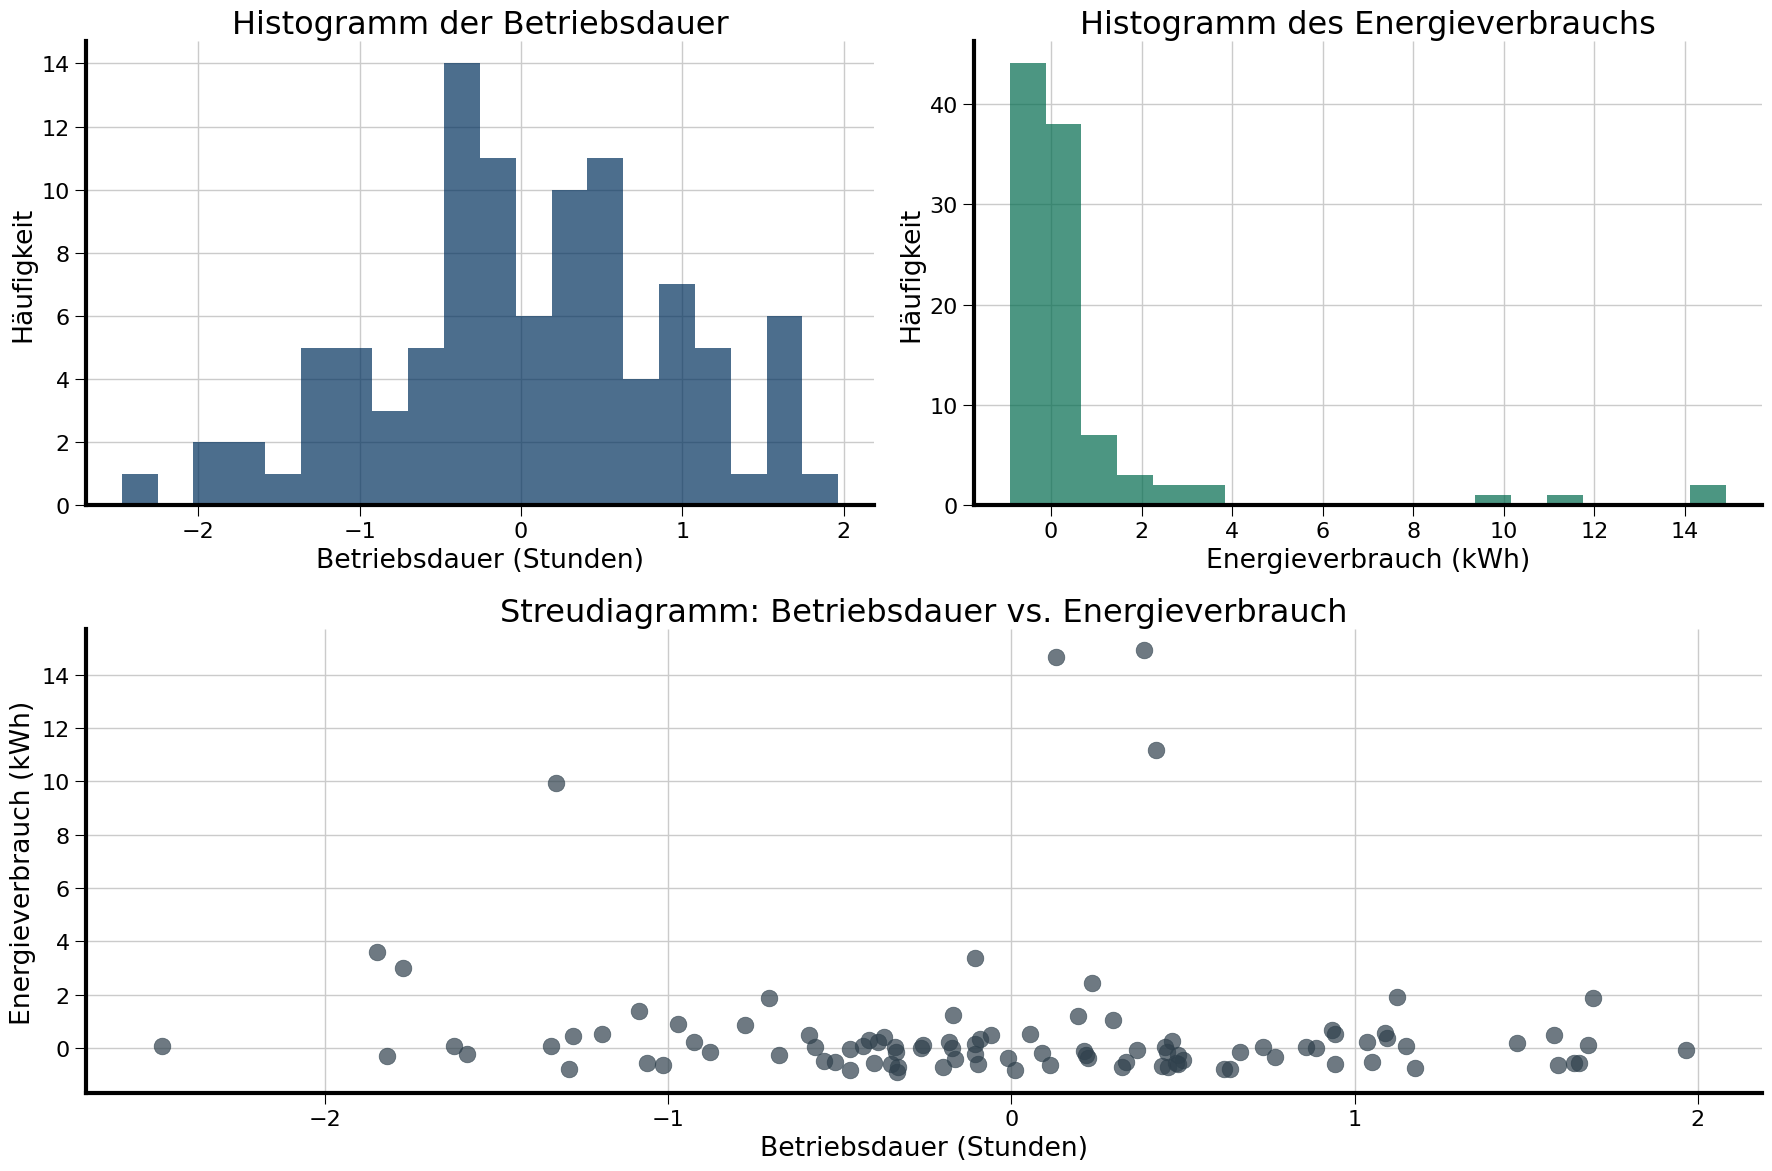

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Setzen eines Seeds für Reproduzierbarkeit
np.random.seed(42)

# Anzahl der Datenpunkte
n_samples = 100

# Generieren der Daten
# Betriebsdauer: Normalverteilte Daten um 5000 Stunden mit einer Standardabweichung von 800 Stunden
operation_hours = np.random.normal(loc=5000, scale=800, size=n_samples)

# Energieverbrauch: Log-normalverteilte Daten, um größere Unterschiede in den Skalen zu erzeugen
energy_consumption = np.random.lognormal(mean=5, sigma=0.5, size=n_samples) * 100

# Hinzufügen von Ausreißern im Energieverbrauch
n_outliers = 5
outliers = np.random.lognormal(mean=7, sigma=0.5, size=n_outliers) * 100
energy_consumption[-n_outliers:] = outliers  # Ersetzen der letzten n_outliers Werte

# Erstellen eines DataFrame
data = pd.DataFrame({
    'Betriebsdauer (Stunden)': operation_hours,
    'Energieverbrauch (kWh)': energy_consumption
})

# Initialisieren des StandardScalers
scaler = RobustScaler()

# Anwenden des StandardScalers auf die Daten
scaled_data = scaler.fit_transform(data)

# Konvertieren der skalierten Daten zurück in ein DataFrame
data = pd.DataFrame(scaled_data, columns=data.columns)


# Erstellen der Plots
#fig, ax = plt.subplots(3, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1, 1]})
plt.figure(figsize=plot_size)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3]


# Scatterplot der beiden Dimensionen über die ganze Breite
ax3.scatter(data['Betriebsdauer (Stunden)'], data['Energieverbrauch (kWh)'], alpha=0.7)
ax3.set_title('Streudiagramm: Betriebsdauer vs. Energieverbrauch')
ax3.set_xlabel('Betriebsdauer (Stunden)')
ax3.set_ylabel('Energieverbrauch (kWh)')

# Histogramm der Betriebsdauer
ax1.hist(data['Betriebsdauer (Stunden)'], bins=20, color=blue, alpha=0.7)
ax1.set_title('Histogramm der Betriebsdauer')
ax1.set_xlabel('Betriebsdauer (Stunden)')
ax1.set_ylabel('Häufigkeit')

# Histogramm des Energieverbrauchs
ax2.hist(data['Energieverbrauch (kWh)'], bins=20, color=green, alpha=0.7)
ax2.set_title('Histogramm des Energieverbrauchs')
ax2.set_xlabel('Energieverbrauch (kWh)')
ax2.set_ylabel('Häufigkeit')

# Verbesserung der Layouts
plt.tight_layout()
plt.show()


# Beispiel: k-Nearest Neighbour auf Fuel Saver

In [22]:
# Lade Auto-Datensatz 
df = pd.read_csv('Auto.csv')
df['horsepower'] = np.where(df['horsepower']=='?', None, df['horsepower'])
df = df.dropna()
df = df.astype({'horsepower':'float', 'weight':'float'})
df['fuel_saver'] = np.where(df['mpg']>30, 1, 0)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model_knn_2 = KNeighborsClassifier(n_neighbors=2).fit(df[['weight', 'horsepower']].to_numpy(), df['fuel_saver'])
df['prediction(fuel_saver)'] = model_knn_2.predict(df[['weight', 'horsepower']].to_numpy())

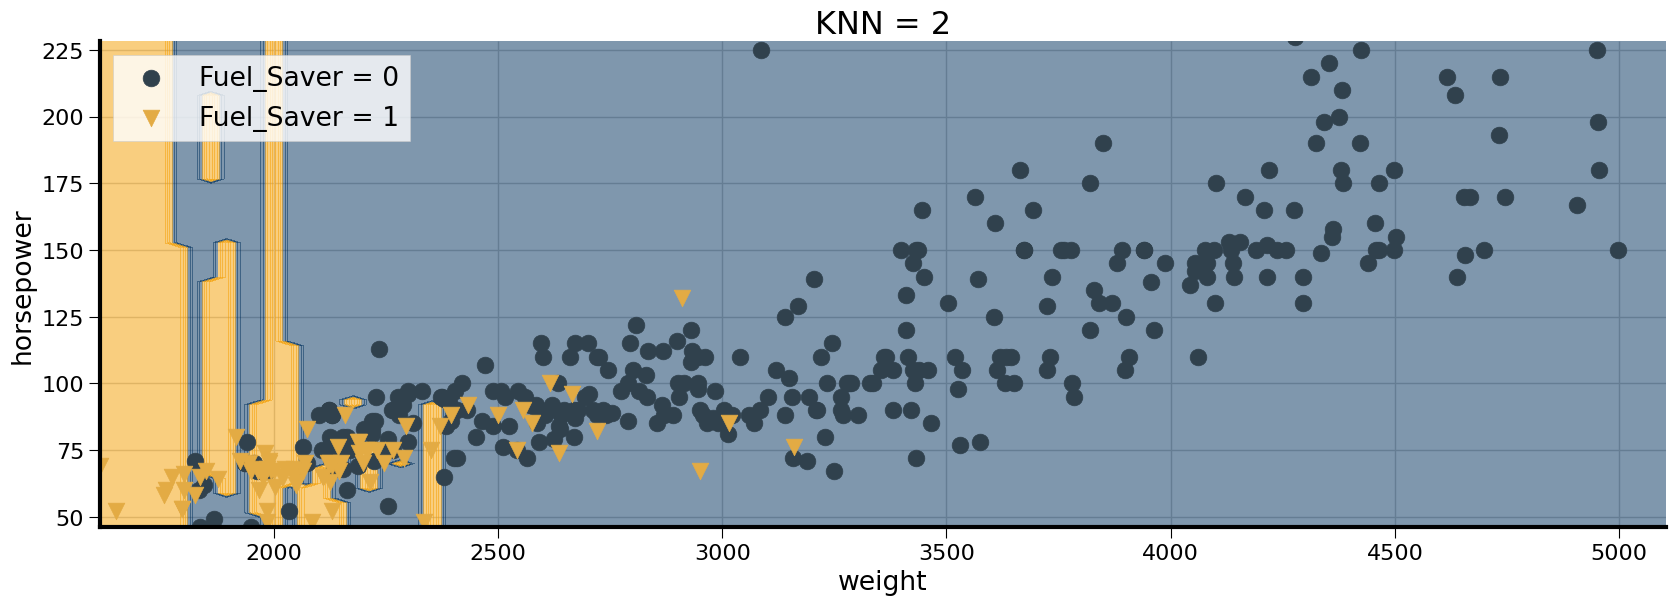

In [24]:
# Plotte die Entscheidungsgrenze

fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

x_min, x_max = df['weight'].min(), df['weight'].max()
y_min, y_max = df['horsepower'].min(), df['horsepower'].max()
n = 100  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = model_knn_2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)

# Plot also the training points
for i in range(2):
    plt.scatter(df[df['fuel_saver'] == i].weight, df[df['fuel_saver'] == i].horsepower, marker=filled_markers[i], label='Fuel_Saver = ' + str(i))

ax.legend()

plt.title('KNN = 2')
plt.ylabel('horsepower')
plt.xlabel('weight')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# Skalierung Fragestellung mit KNN

* Skalierung ist offensichtlich relevant für die visuelle Interpretation der Daten
* Ist es notwendig für die Performance der Modelle?
* Vorhersage basierend auf *horsepower* und *weight*
* Beide Eingabeparameter unterscheiden sich um ca. eine Größenordnung

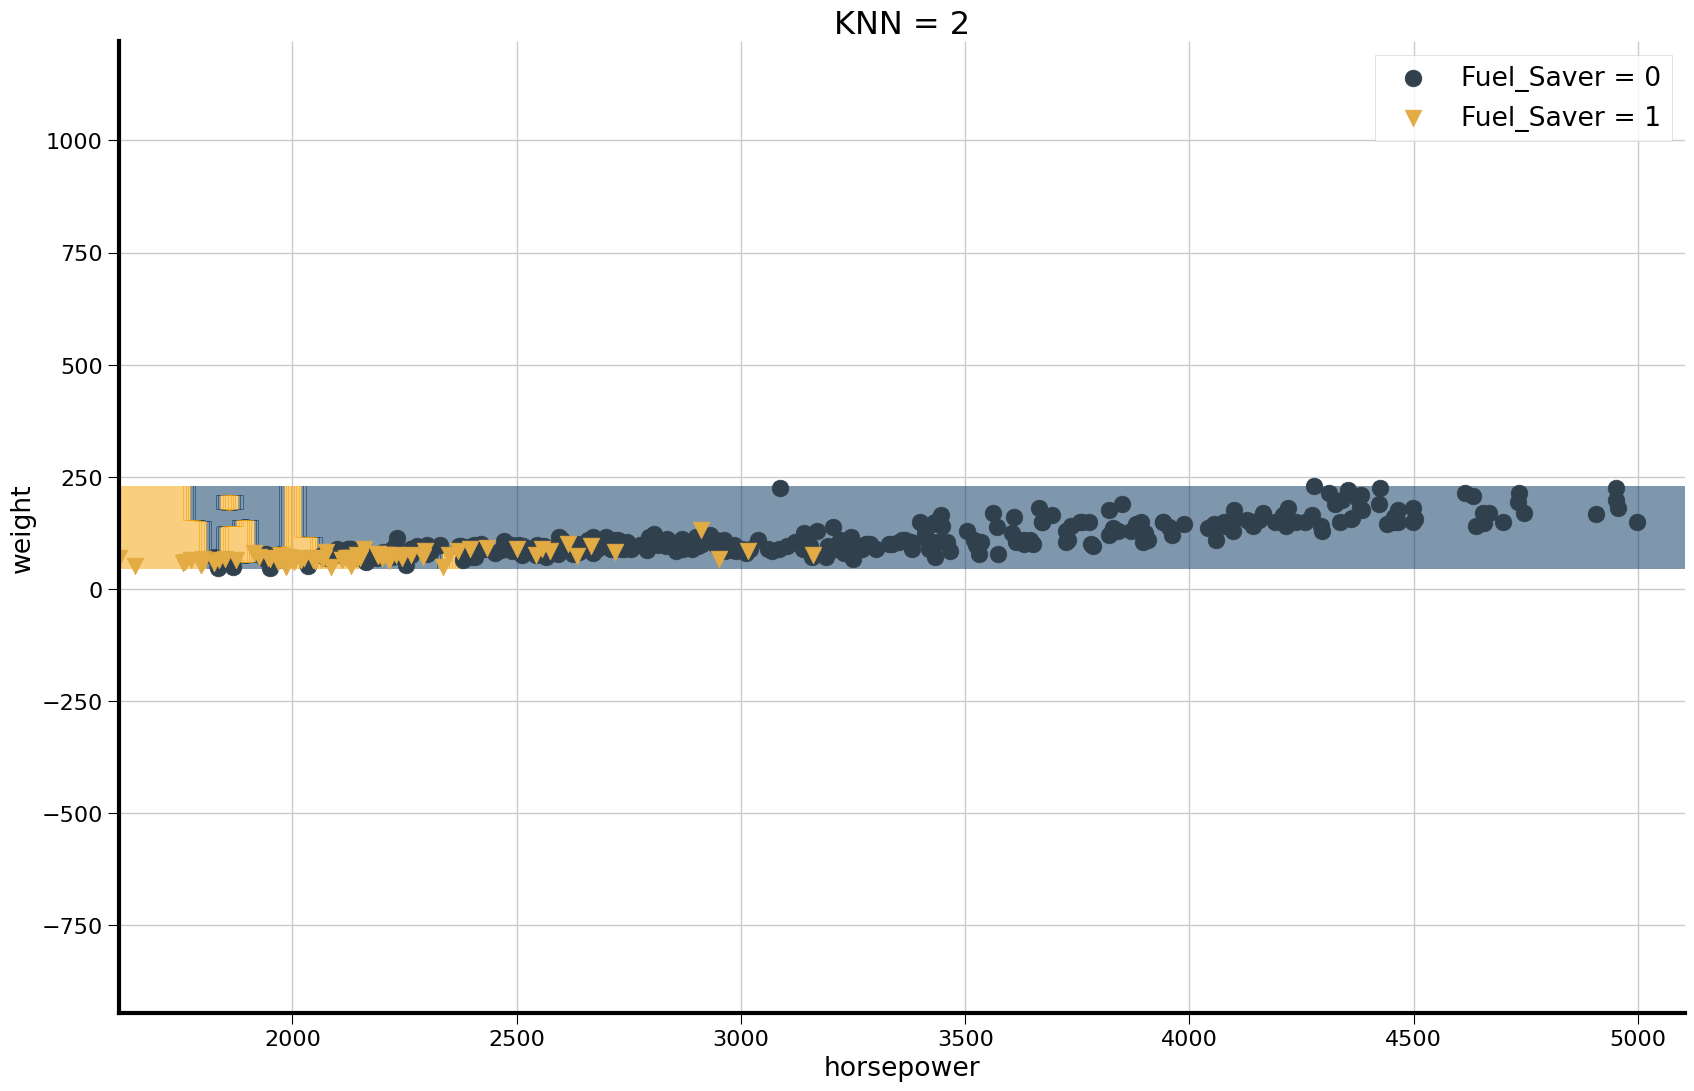

In [25]:
# Plotte die Entscheidungsgrenze

fig, ax = plt.subplots(1, 1, figsize=plot_size)

x_min, x_max = df['weight'].min(), df['weight'].max()
y_min, y_max = df['horsepower'].min(), df['horsepower'].max()
n = 100  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = model_knn_2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)

# Plot also the training points
for i in range(2):
    plt.scatter(df[df['fuel_saver'] == i].weight, df[df['fuel_saver'] == i].horsepower, marker=filled_markers[i], label='Fuel_Saver = ' + str(i))

ax.axis('equal')

ax.legend()

plt.title('KNN = 2')
plt.ylabel('weight')
plt.xlabel('horsepower')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# Führe eine Z-Normalisierung durch...

In [26]:
features = ['horsepower', 'weight']
df[features] = df[features].apply(lambda x: (x - x.mean()) / x.std())

In [27]:
model_knn_2 = KNeighborsClassifier(n_neighbors=2).fit(df[['weight', 'horsepower']].to_numpy(), df['fuel_saver'])
df['prediction(fuel_saver)'] = model_knn_2.predict(df[['weight', 'horsepower']].to_numpy())

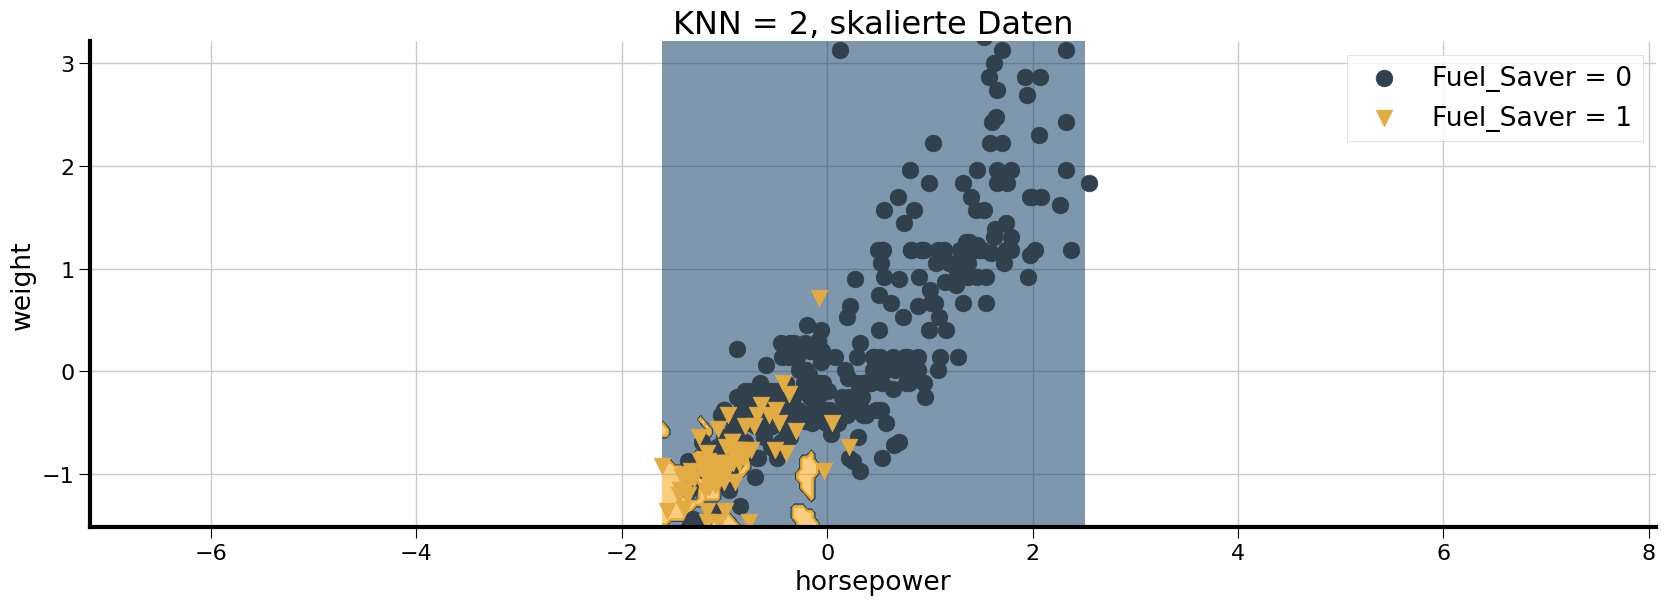

In [28]:
# Plotte die Entscheidungsgrenze

fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

x_min, x_max = df['weight'].min(), df['weight'].max()
y_min, y_max = df['horsepower'].min(), df['horsepower'].max()
n = 100  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = model_knn_2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)

# Plot also the training points
for i in range(2):
    plt.scatter(df[df['fuel_saver'] == i].weight, df[df['fuel_saver'] == i].horsepower, marker=filled_markers[i], label='Fuel_Saver = ' + str(i))

ax.axis('equal')

ax.legend()

plt.title('KNN = 2, skalierte Daten')
plt.ylabel('weight')
plt.xlabel('horsepower')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# Over/Under  Sampling

* Offensichtlich existieren Datensätze in denen die Klassen nicht gleichverteilt sind. 
* Für diverse Algorithmen kann diese Verteilung das Training negativ beeinflußen. 
* Aus Sicht der Daten bestehen zwei Möglichkeiten: 
    * Undersampling, d.h. weniger Datensätze der häufigen Klasse verwenden
        * Einfache und exakte Methode
        * Verlust von Trainingsdaten
    * Oversampling, d.h. hinzufügen (generischer) Datensätze der seltenen Klasse
        * Daten werden geraten / können Fehler beinhalten bzw. einführen
        * Ggfs. numerisch aufwendig

In [29]:
df['fuel_saver'] = np.where(df['mpg']>30, 1, 0)

In [30]:
X = df[['horsepower', 'weight']]
y = df['fuel_saver']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

model_knn_5 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
f1_score(y_test, model_knn_5.predict(X_test), average='binary'), sum(y_train)/len(y_train)

(0.5882352941176471, 0.2108626198083067)

# SMOTE: Synthetic Minority Over-sampling Technique


<center><img src="img/tafel_smote.png" width=50% class="stretch"></center>


* Gängige Methoden, um Daten der seltenen Klasse aufzufüllen.
* Kann beliebig viele Daten genierieren; in der Regel ganzzahlige Vielfache.
* Basiert auf Nearest Neighbour Logik

# SMOTE in Python

In [31]:
# Zufälliger Startpunkt
fuel_savers = X_train[y_train==1].copy() 
start = fuel_savers.sample()
start_hp = start.horsepower.values[0]
start_w = start.weight.values[0]
start

,horsepower,weight
383,-0.973454,-1.192113


In [32]:
# Berechne Neirest Neighbours
fuel_savers['dist'] = np.sqrt((fuel_savers.horsepower-start_hp)**2+(fuel_savers.weight-start_w)**2)
fuel_savers.sort_values(by=['dist']).head(n=3)

,horsepower,weight,dist
383,-0.973454,-1.192113,0.000000
129,-0.973454,-1.209773,0.017659
376,-0.947474,-1.186227,0.026639


In [33]:
 # Neuer Punkt
nn = fuel_savers.sort_values(by=['dist']).values[1]
rand = np.random.rand() # Wähle ein zufällige Zahl zwischen 0-1

neu_hp = start_hp + rand* (nn[0]-start_hp)
neu_w = start_w + rand* (nn[1]-start_w)

print('SMOTE Punkt 1 liegt bei HP: {} und Weight: {}'.format(neu_hp, neu_w) )

SMOTE Punkt 1 liegt bei HP: -0.9734543677169109 und Weight: -1.2033849327337032


# SMOTE in Python II

In [34]:
# Und einmal für alle Fuel Saver 
# Entspricht SMOTE 100%, d.h. Verdoppelung der ursprünglichen Daten
fuel_savers = X_train[y_train==1].copy() 

for i, r in fuel_savers.iterrows():
    start_hp = r.horsepower
    start_w = r.weight
    fuel_savers['dist'] = np.sqrt((fuel_savers.horsepower-start_hp)**2+(fuel_savers.weight-start_w)**2)

    nn = fuel_savers.sort_values(by=['dist']).values[1]
    rand = np.random.rand() 
    hp = start_hp + rand* (nn[0]-start_hp)
    w = start_w + rand* (nn[1]-start_w)
    
    X_train = pd.concat([X_train, pd.DataFrame([[hp, w]],columns=X_train.columns)], axis=0, ignore_index=True)
    y_train = pd.concat([y_train, pd.DataFrame([[1]])], axis=0, ignore_index=True)

In [35]:
# Wir nehmen lediglich neue Trainingsdaten!
model_knn_5 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train.to_numpy().ravel())
f1_score(y_test, model_knn_5.predict(X_test), average='binary'), sum(y_train)/len(y_train)

(0.5945945945945946, 0.0)

# SMOTE

* SMOTE basiert auf der Annahme, dass Datensätze dergleichen Klasse auch *nah* in den Daten beieinander liegen. Diese Aussage muss nicht korrekt sein. 

* Es sollte vermieden werden, zu viele Datensätze neu zu generieren, da dies den Datensatz zu stark verfälscht. 

* SMOTE darf nur auf den Trainingsdaten, aber niemals auf den Testdaten angewendet werden. 

# Zusammenfassung

* Validierung von Modellen
* Feature Engineering I 
    * Missing Values
    * One Hot Encoding
    * Skalierung
    * Over / Undersampling (SMOTE)